In [61]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [62]:
iris= pd.read_csv("iris.csv", names=['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'class'])
iris.sample(10)



,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
35,5.0,3.2,1.2,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
116,6.5,3.0,5.5,1.8,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [63]:
iris.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

# There are no missing values in the dataset

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [64]:
iris_new=iris.replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica' ], value=[0,1,2])
#iris_class=iris_new.pop('class')
#iris_class.astype(int, inplace=True)

#iris_new['class']=iris_class
iris_new.dtypes

sepal_length_in_cm    float64
sepal_width_in_cm     float64
petal_length_in_cm    float64
petal_width_in_cm     float64
class                   int64
dtype: object

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

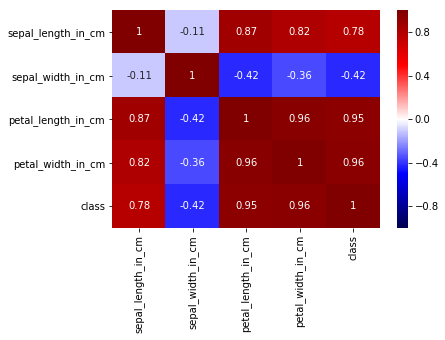

In [65]:
import seaborn as sns
sns.heatmap(iris_new.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [66]:
iris_new.corr()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
sepal_length_in_cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width_in_cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length_in_cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width_in_cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [67]:
iris_new.var()

sepal_length_in_cm    0.685694
sepal_width_in_cm     0.188004
petal_length_in_cm    3.113179
petal_width_in_cm     0.582414
class                 0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

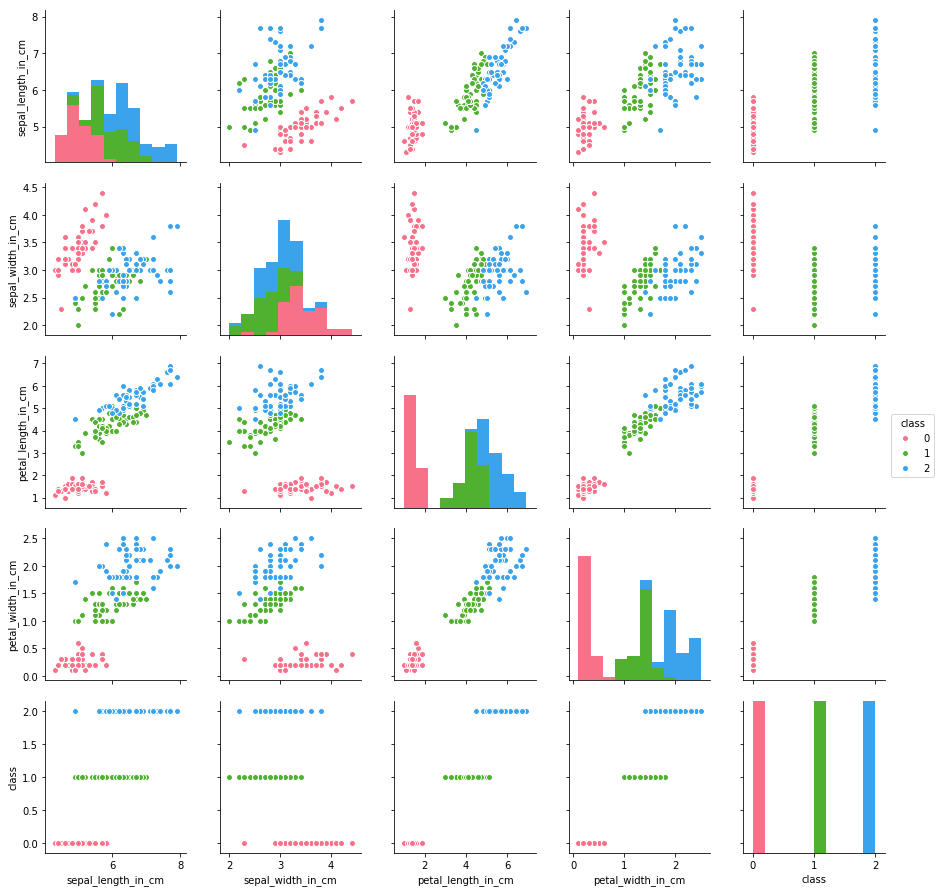

In [68]:
import seaborn as sns
#sns.pairplot(iris_new,hue="iris_new", diag_kind = 'kde')
g = sns.pairplot(iris_new, palette="husl",hue='class')
#g = sns.pairplot(iris_new)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [69]:
from sklearn import preprocessing

X_unscaled = iris_new.iloc[:, 0:4].values
y = iris_new.iloc[:, -1].values
X=preprocessing.scale(X_unscaled)

In [70]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors =3 , weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [72]:
y_pred=NNH.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.92      1.00      0.96        11
          2       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        30



In [75]:
NNH = KNeighborsClassifier(n_neighbors =5 , weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [76]:
NNH = KNeighborsClassifier(n_neighbors =9 , weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [77]:
from sklearn.model_selection import cross_val_score
Validation_scores=[]
neighbours= np.arange(1,21,2)
for k in neighbours:
    MSEN = KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score (MSEN, X_train,y_train,cv=3, scoring='accuracy')
    Validation_scores.append(scores.mean())
Validation_scores
MSE=[1-x for x in Validation_scores]
best_k=neighbours[MSE.index(min(MSE))]
print("All MSE Values: \n", MSE, "\n\n")
print("Minimum MSE Value:\n", min(MSE), "\n\n")
#MSEN.best_params_
print("Best K value is: ", best_k)

All MSE Values: 
 [0.07545861997081504, 0.041890765061496804, 0.0335574317281635, 0.0337711069418386, 0.0335574317281635, 0.025010423181154873, 0.025010423181154873, 0.04210444027517202, 0.05044819678966028, 0.06712528663748174] 


Minimum MSE Value:
 0.025010423181154873 


Best K value is:  11


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

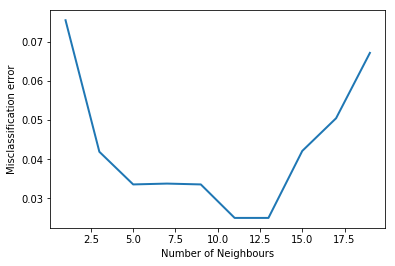

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline

#plt.plot(x, y, linewidth=2.0)
plt.plot(neighbours,MSE,linewidth=2.0 )
plt.xlabel("Number of Neighbours")
plt.ylabel("Misclassification error")
plt.show()

# Naive Bayes with Iris Data

In [79]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [80]:
X_unscaled = iris_new.iloc[:, 0:4].values
y = iris_new.iloc[:, -1].values
X=preprocessing.scale(X_unscaled)

In [81]:
#Check the dataset
print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.494

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [82]:
import seaborn as sns


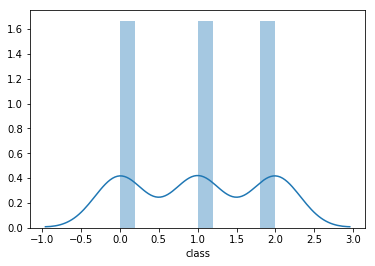

In [83]:
sns.distplot(iris_new['class'],bins=10)

(array([ 50.,  50.,  50.,  50.,  50., 100., 100., 100., 100., 150.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

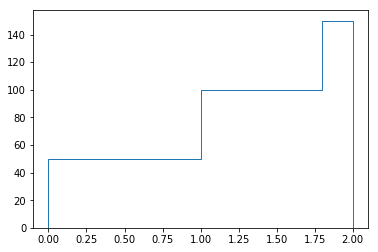

In [84]:
plt.hist(iris_new['class'],bins=10,histtype='step',cumulative=True) #ogive plot

# Drop Id variable from data

No explanation given on why an independent variable needs to be dropped..
there is low correlation and variance as  shown in Q4 and Q5.. no independent variables will be dropped

### Question 12 
Find Correlation among all variables and give your insights 

In [85]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

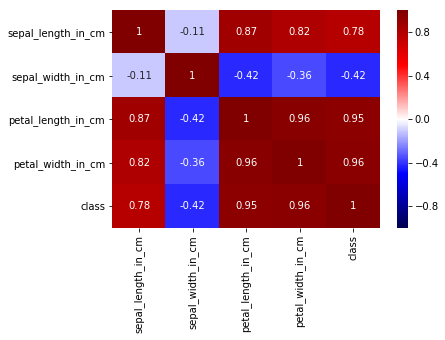

In [86]:

sns.heatmap(iris_new.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

### Split data in Training and test set in 80:20.

In [87]:
from sklearn import preprocessing

X_new = iris_new.iloc[:, 0:4].values
y_new = iris_new.iloc[:, -1].values
X=preprocessing.scale(X_unscaled)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

### Question 13 
Do Feature Scaling 

In [88]:
# Use StandardScaler or similar methods

# Using the Preprocessing function from SKlearn to scale the values of X

In [89]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

X=min_max.fit_transform(X_new)


#X_transformed=preprocessing.scale(X_new)
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.2, random_state = 42)

### Question 14 
Train and Fit NaiveBayes Model

In [90]:
#Fit the model
from sklearn.naive_bayes import BernoulliNB  # Bernoulli for Binomial
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [91]:
#Predict
y_pred=NB.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [92]:
# show Confusion Matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[ 2,  8,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

In [93]:
# show accuracy
metrics.accuracy_score(y_test,y_pred)

0.36666666666666664

In [94]:
#Show precision and Recall metrics

In [95]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.20      0.33        10
          1       0.32      1.00      0.49         9
          2       0.00      0.00      0.00        11

avg / total       0.43      0.37      0.26        30



# Multinomial is good for when your features are categorical. Bernoulli is good for making predictions from binary features. Trying Multinomial below

In [96]:
from sklearn.naive_bayes import MultinomialNB  # Bernoulli for Binomial
MB = MultinomialNB()
MB.fit(X_train, y_train)
y_pred=MB.predict(X_test)
print(y_pred)


[1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]


In [97]:
metrics.confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

In [98]:
# show accuracy
metrics.accuracy_score(y_test,y_pred)

0.6333333333333333

In [99]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.45      1.00      0.62         9
          2       0.00      0.00      0.00        11

avg / total       0.47      0.63      0.52        30



# Gaussian is used when the features are continuous

In [104]:
from sklearn.naive_bayes import GaussianNB  # Bernoulli for Binomial
GB = GaussianNB()
GB.fit(X_train, y_train)
y_pred=GB.predict(X_test)
print(y_pred)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [105]:
metrics.confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [106]:
# show accuracy
metrics.accuracy_score(y_test,y_pred)

1.0

In [103]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



# Gaussian Naive Bayes gives the best outcome for all the parameters

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779